In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch import optim
from torch.autograd import Variable
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np
from random import randint

In [2]:
class CNN(nn.Module):
  """ 
  Implements a Convolutional Neural Network for Classification
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
  """
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Sequential(
        #input image shape 28x28x1 and apply convolutional layer with same padding
        nn.Conv2d(in_channels=1,out_channels=8,kernel_size=5,stride=1,padding=2),
        #new shape 28x28x8
        nn.ReLU(),
        #new shape 14x14x8
        nn.MaxPool2d(kernel_size=2),
    )
    self.conv2 = nn.Sequential(
        # input shape 14x14x8
        nn.Conv2d(8, 32, 5, 1, 2),
        # new shape 14x14x32
        nn.ReLU(),
        # 7x7x32
        nn.MaxPool2d(2),
    )
    self.out = nn.Linear(32 * 7 * 7, 10)
  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
    x = x.view(x.size(0), -1)
    output = self.out(x)
    return output

  def train_model(self, num_epochs, train_loader, lr):
    self.train()
    optimizer = optim.SGD(self.parameters(), lr=lr)
    loss_function = nn.CrossEntropyLoss()
    total_step = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)
            #compute the forward pass
            output = self(images)
            #compute the loss
            loss = loss_function(output, labels)
            # clear gradients for this training step
            optimizer.zero_grad()
            # backpropagation, compute gradients
            loss.backward()
            # apply gradients
            optimizer.step()

            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                      .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
                
  def test_model(self, test_loader):
    self.eval()
    predictions = []
    labels_list = []
    with torch.no_grad():
      for images, labels in test_loader:
          images = images.to(device)
          labels = labels.to(device)
          
          # Forward pass to get output/logits
          outputs = self(images)
          
          # Predictions are the maximum value locations in logits dimension
          _, predicted = torch.max(outputs.data, 1)
          
          # Collect the predictions and labels
          predictions.extend(predicted.cpu().numpy())
          labels_list.extend(labels.cpu().numpy())
    correct = (np.array(predictions) == np.array(labels_list)).sum()
    total = len(labels_list)
    accuracy = correct / total
    print(f'Accuracy of the network on the test images: {accuracy * 100:.2f}%') 

In [3]:
#normalization
transform1 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Adjusted for one channel
])

#Load Data:
# train_data = datasets.MNIST(root = 'data', train = True, transform = transforms.ToTensor(),download = True)
# test_data = datasets.MNIST(root = 'data', train = False,transform = transforms.ToTensor())

train_data_norm = datasets.MNIST(root = 'data', train = True, transform = transform1,download = True)
test_data_norm = datasets.MNIST(root = 'data', train = False,transform = transform1)

print("The size of the train data", train_data_norm.data.size())
print("The size of the test data", test_data_norm.data.size())



Failed to download (trying next):
HTTP Error 503: Service Unavailable



100.0%


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100.0%


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100.0%


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100.0%

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

The size of the train data torch.Size([60000, 28, 28])
The size of the test data torch.Size([10000, 28, 28])


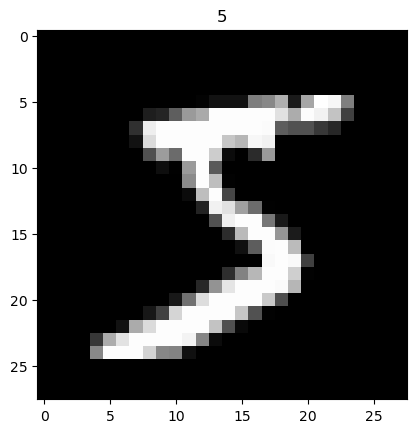

In [5]:
#display one of the training examples and its label
plt.imshow(train_data_norm.data[0], cmap='gray')
plt.title('%i' % train_data_norm.targets[0])
plt.show()

In [6]:
# Parameters
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 200
learning_rate_1 = .01
learning_rate_2 = .001
num_epochs = 10

#initialize dataLoader Objects
train_loader_norm = torch.utils.data.DataLoader(train_data_norm,batch_size=batch_size,shuffle=True,num_workers=1)
test_loader_norm = torch.utils.data.DataLoader(test_data_norm,batch_size=batch_size,shuffle=True,num_workers=1)

#initialize and train model
model = CNN()
model.to(device)
model.train_model(num_epochs, train_loader_norm, learning_rate_1)

Epoch [1/10], Step [100/300], Loss: 1.7308
Epoch [1/10], Step [200/300], Loss: 0.5805
Epoch [1/10], Step [300/300], Loss: 0.3973
Epoch [2/10], Step [100/300], Loss: 0.3930
Epoch [2/10], Step [200/300], Loss: 0.2794
Epoch [2/10], Step [300/300], Loss: 0.2465
Epoch [3/10], Step [100/300], Loss: 0.1171
Epoch [3/10], Step [200/300], Loss: 0.2274
Epoch [3/10], Step [300/300], Loss: 0.2654
Epoch [4/10], Step [100/300], Loss: 0.1565
Epoch [4/10], Step [200/300], Loss: 0.1615
Epoch [4/10], Step [300/300], Loss: 0.1187
Epoch [5/10], Step [100/300], Loss: 0.1165
Epoch [5/10], Step [200/300], Loss: 0.1459
Epoch [5/10], Step [300/300], Loss: 0.1523
Epoch [6/10], Step [100/300], Loss: 0.0851
Epoch [6/10], Step [200/300], Loss: 0.0912
Epoch [6/10], Step [300/300], Loss: 0.0593
Epoch [7/10], Step [100/300], Loss: 0.0914
Epoch [7/10], Step [200/300], Loss: 0.0955
Epoch [7/10], Step [300/300], Loss: 0.0719
Epoch [8/10], Step [100/300], Loss: 0.0976
Epoch [8/10], Step [200/300], Loss: 0.0652
Epoch [8/10

In [7]:
#test model
model.test_model(test_loader_norm)

Accuracy of the network on the test images: 97.85%


In [8]:
# Save the model checkpoint
model_path = './MNIST_CNN.pth'
torch.save(model.state_dict(), model_path)